In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import spacy

In [18]:
df = pd.read_csv('data/wine_quality.csv')
df = df.drop(columns=['Unnamed: 0'])

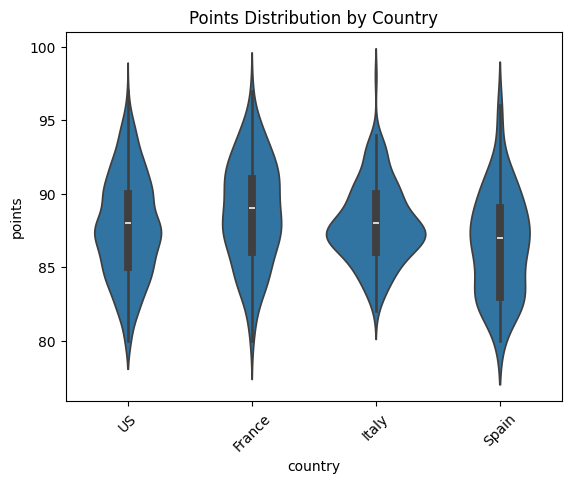

In [19]:
sns.violinplot(data=df, x='country', y='points')
plt.title('Points Distribution by Country')
plt.xticks(rotation=45)
plt.show()

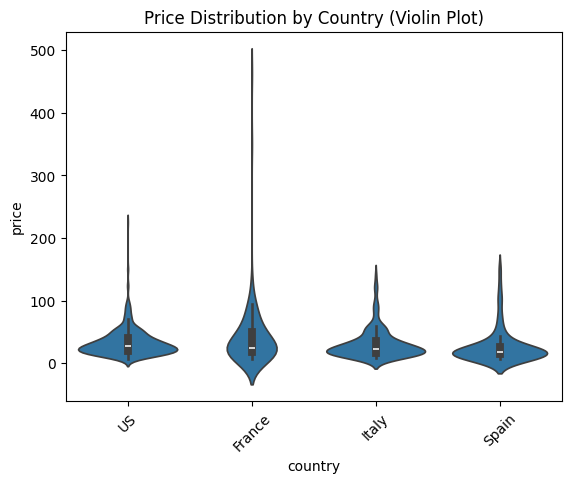

In [20]:
sns.violinplot(data=df, x='country', y='price')
plt.title('Price Distribution by Country (Violin Plot)')
plt.xticks(rotation=45)
plt.show()

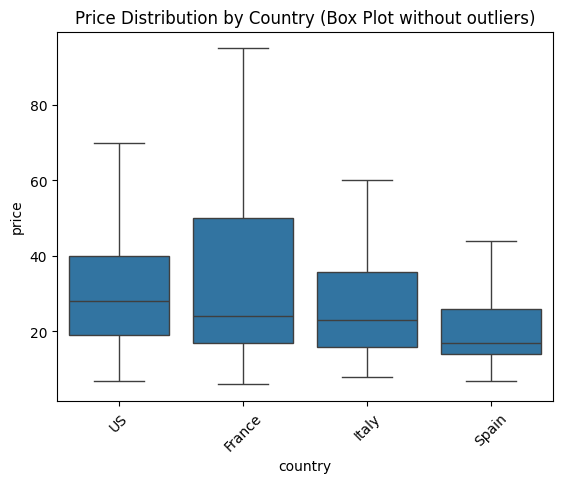

In [21]:
sns.boxplot(data=df, x='country', y='price', showfliers=False)
plt.title('Price Distribution by Country (Box Plot without outliers)')
plt.xticks(rotation=45)
plt.show()

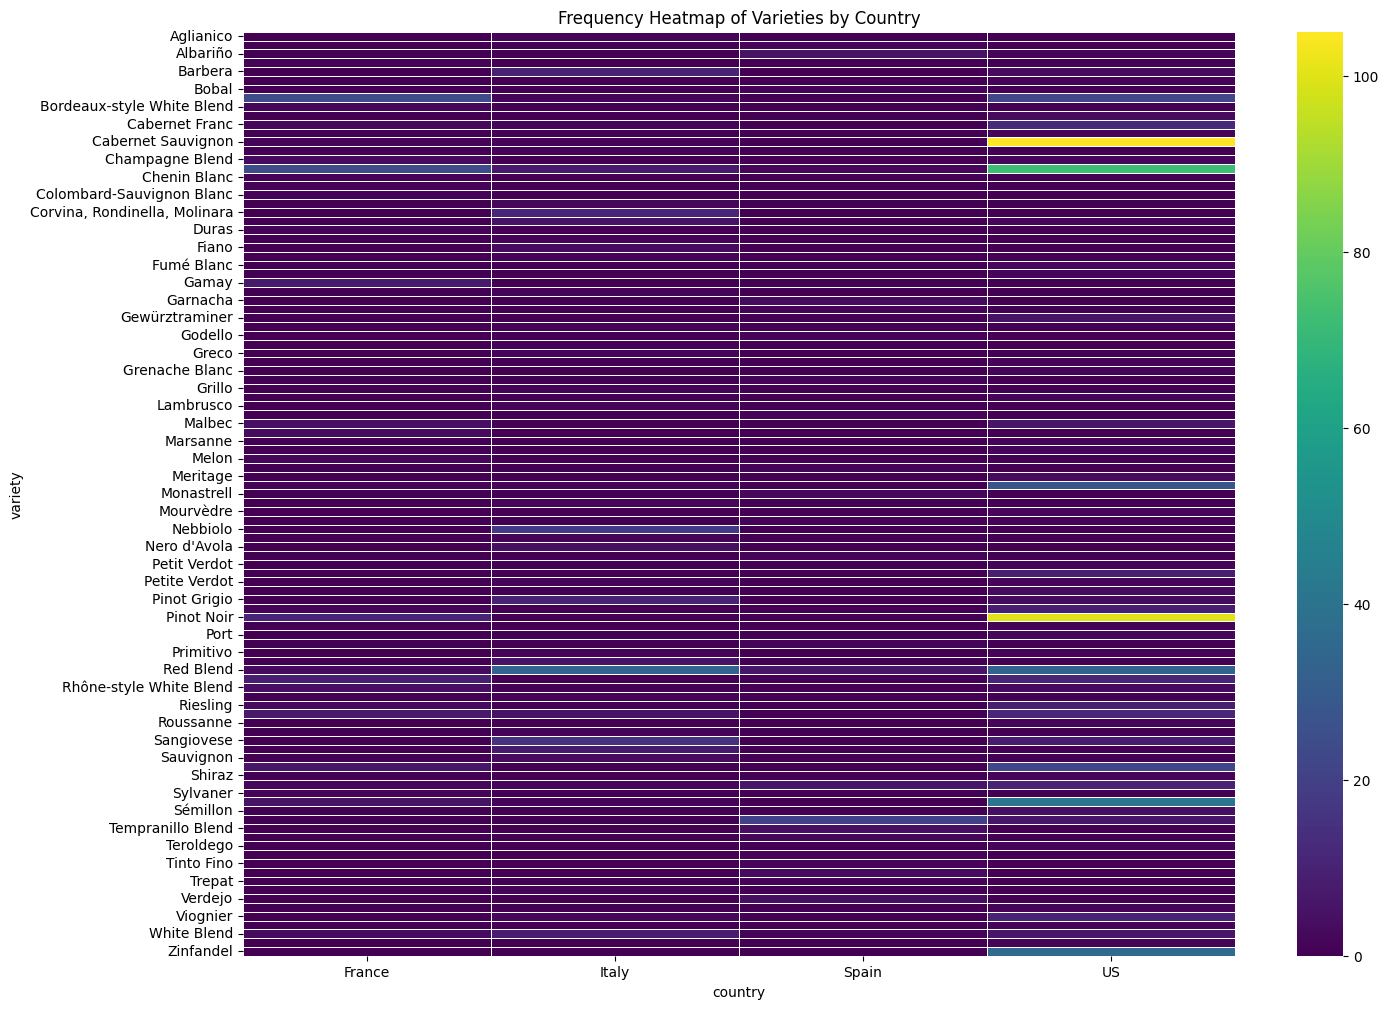

In [22]:
import numpy as np

# Pivot table for heatmap
heatmap_data = df.pivot_table(index='variety', columns='country', aggfunc='size', fill_value=0)

# Plot
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, cmap='viridis', linewidths=0.5)
plt.title('Frequency Heatmap of Varieties by Country')
plt.show()

In [23]:
import plotly.express as px




In [24]:
print(df["variety"].nunique())
df['country'].value_counts()
data = df.copy()

variety_counts = data['variety'].value_counts()
threshold = 3
rare_varieties = variety_counts[variety_counts < threshold].index
data['variety_grouped'] = data['variety'].replace(rare_varieties, 'Other')
grouped_counts = data['variety_grouped'].value_counts()
print(grouped_counts)


105
variety_grouped
Pinot Noir                       111
Cabernet Sauvignon               107
Chardonnay                       105
Red Blend                         76
Other                             72
Bordeaux-style Red Blend          47
Syrah                             47
Zinfandel                         36
Merlot                            29
Sauvignon Blanc                   28
Tempranillo                       26
Sangiovese                        23
Rosé                              23
Rhône-style Red Blend             20
Sparkling Blend                   20
White Blend                       18
Nebbiolo                          18
Cabernet Franc                    15
Barbera                           13
Pinot Grigio                      13
Riesling                          12
Viognier                          12
Corvina, Rondinella, Molinara     11
Malbec                            10
Pinot Gris                        10
Petite Sirah                       9
Dolcetto          

In [25]:
fig = px.sunburst(data, path=['country', 'variety_grouped'], values='price',  # Adjust 'price' if another column is better suited
                  title='Country and Variety Breakdown')
fig.show()

In [32]:
nlp = spacy.load("en_core_web_sm")

def contains_location(text):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":  # GPE = Geo-Political Entity
            return True  # Location detected
    return False  # No location detected

In [33]:
wine_data = df.copy()
# Apply the function to the description column
wine_data['contains_location'] = wine_data['description'].apply(contains_location)

# Count the rows with location data
num_with_location = wine_data['contains_location'].sum()
total_descriptions = len(wine_data)

# Calculate the percentage of descriptions with locations
percentage_with_location = (num_with_location / total_descriptions) * 100

print(f"Descriptions with locations: {num_with_location}")
print(f"Total descriptions: {total_descriptions}")
print(f"Percentage with location data: {percentage_with_location:.2f}%")


Descriptions with locations: 130
Total descriptions: 1000
Percentage with location data: 13.00%


In [34]:
data = pd.read_csv('data/wine_quality_with_locations_and_keywords.csv')
print(len(data))

1000
